# Hierarchical Clustering

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (20,10)

## Importing the dataset

In [46]:
dataset = pd.read_csv('Mall_Customers.csv')
# = dataset.iloc[:, [3,4]]

#3 variables
X = dataset.iloc[:, 2:5]

X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Using the dendrogram to find the optimal number of clusters

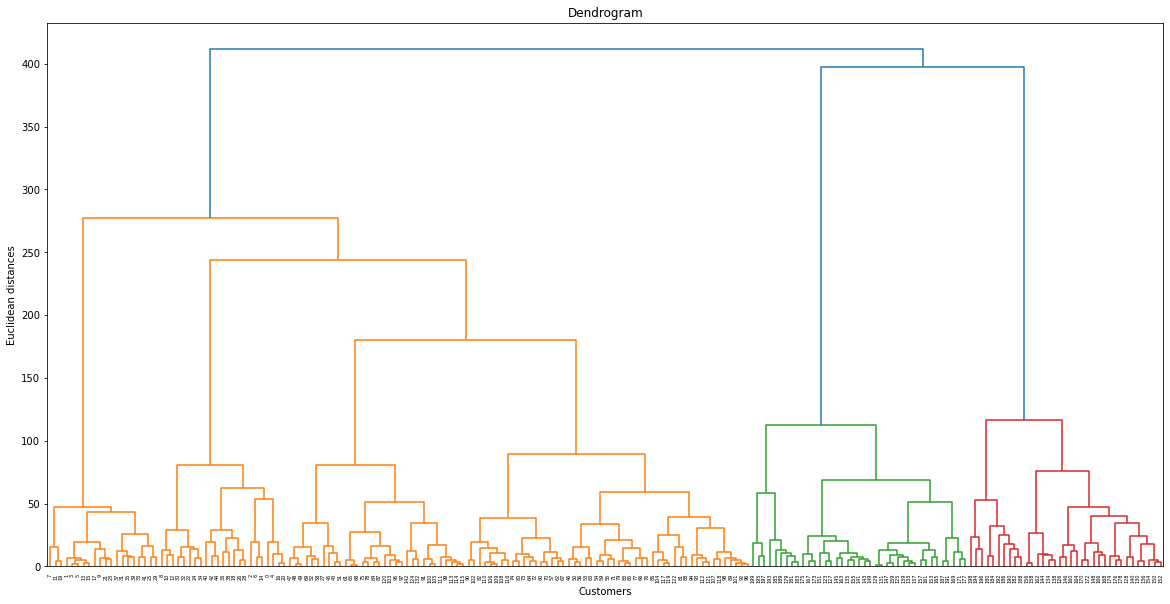

In [47]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [48]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [49]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Visualising the clusters

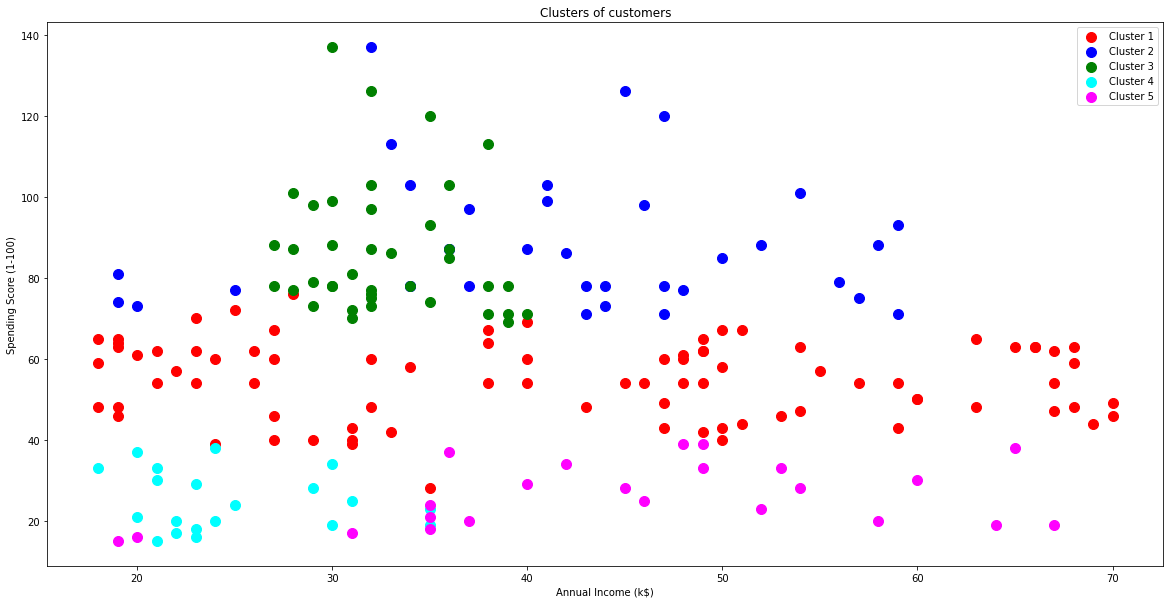

In [50]:
plt.scatter(X[y_hc == 0].iloc[:,0], X[y_hc == 0].iloc[:,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1].iloc[:,0], X[y_hc == 1].iloc[:,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2].iloc[:,0], X[y_hc == 2].iloc[:,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3].iloc[:,0], X[y_hc == 3].iloc[:,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4].iloc[:,0], X[y_hc == 4].iloc[:,1], s = 100, c = 'magenta', label = 'Cluster 5')





#plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Attempting to plot in 3d

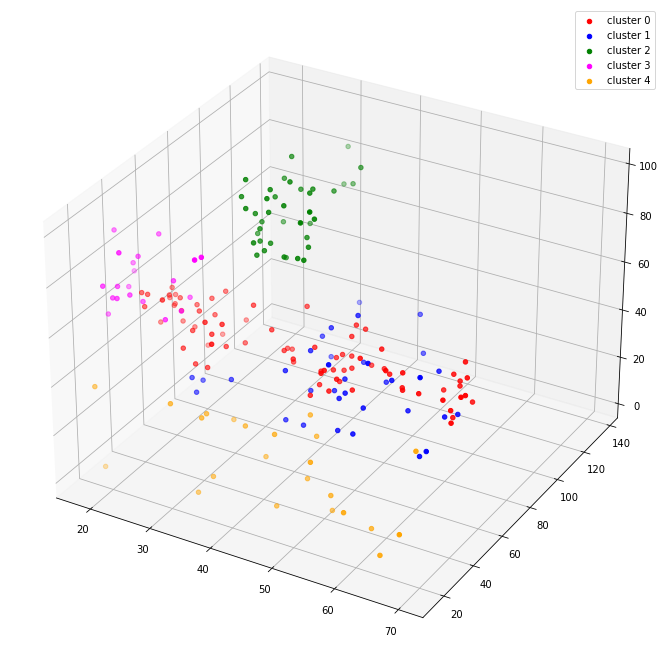

In [51]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

colours = ['red','blue','green','magenta','orange']

for cluster in range(0,5):
    sequence_containing_x_vals = X[y_hc == cluster].iloc[:,0]
    sequence_containing_y_vals = X[y_hc == cluster].iloc[:,1]
    sequence_containing_z_vals = X[y_hc == cluster].iloc[:,2]
    #print('did it ')
    ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,color = colours[cluster], label=f'cluster {cluster}')

#centroid_x = kmeans.cluster_centers_[:, 0]
#centroid_y = kmeans.cluster_centers_[:, 1]
#centroid_z = kmeans.cluster_centers_[:, 2]

#ax.scatter(centroid_x, centroid_y, centroid_z, s = 100, color = 'black')

plt.legend()
plt.show()

In [63]:
experiment = '''
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    ax.clear()
    plt.plot()
    plt.pause(.0001)
    
    '''


#exec(experiment)

In [ ]:
#See wire3d_animation_demo for another simple example of animating a 3D plot.
